# This is a Project that shows correlation using Python

In [120]:
# Importing Libraries

import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)  # Adjusts the figsize of the graphs


# Reading in the data

df = pd.read_csv('movies.csv')

In [121]:
# Optional 
# Removing the limit of rows shown in the Jupyter notebook
pd.set_option('display.max_rows', None)

## Looking at the Data

In [122]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [124]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## Nulls and Missing Data 

We can distinguish there are a few null values in some columns but in the budget field we have more than 2100 values that are null. We need to clean those values/rows.

In [125]:
for col in df.columns:
    missing_values = df[col].isna().sum()
    print(f'{col}: {missing_values}')

name: 0
rating: 77
genre: 0
year: 0
released: 2
score: 3
votes: 3
director: 0
writer: 3
star: 1
country: 3
budget: 2171
gross: 189
company: 17
runtime: 4


In [126]:
# Data Types of our DataSet

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [127]:
# Droping the N/A Values.

df.dropna(how = 'any', axis = 0, inplace = True)

In [128]:
# Clearing the data types

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   int64  
 12  gross     5421 non-null   int64  
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 677.6+ KB


In [130]:
# Extracts the Correct Year from the released column

def extract_year(string):
    # Finds the year with string manipulation
    year = string.split(' ')[2:3]
    return ''.join(year)

# Creation of the correctYear Column

df['yearcorrect'] = df['released'].astype(str).apply(extract_year)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [131]:
#Find duplicates by comparing the original with the next df. 

df.nunique() # Counts unique Names

name           5336
rating           10
genre            15
year             41
released       2560
score            72
votes           717
director       2063
writer         3205
star           1845
country          50
budget          398
gross          5418
company        1475
runtime         127
yearcorrect      45
dtype: int64

In [132]:
# Count unique values after removing duplicates

df.drop_duplicates().sort_values(by = ['gross'], ascending=False).nunique()

name           5336
rating           10
genre            15
year             41
released       2560
score            72
votes           717
director       2063
writer         3205
star           1845
country          50
budget          398
gross          5418
company        1475
runtime         127
yearcorrect      45
dtype: int64

***As we can see there is not any difference between the original and the new dataframe where we removed the duplicates. So there are not any.***

## Discovering Correlations by visualization

We start by guessing that the correaltion may be found. 
We will try to find correlation with the gross every movie makes using the Budget and the company's name.

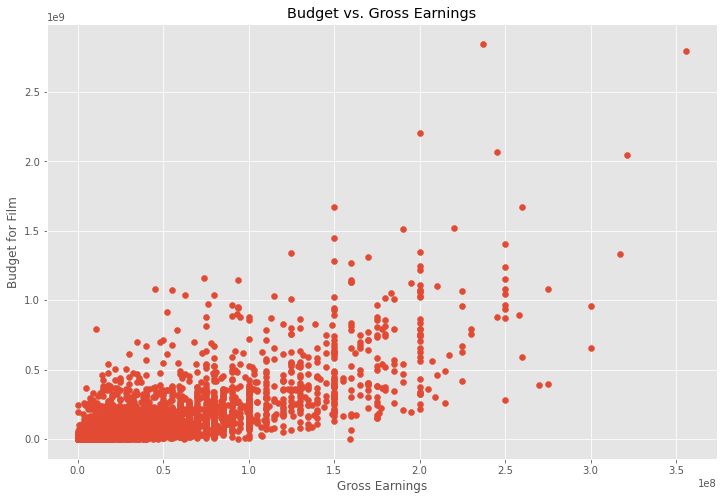

In [133]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

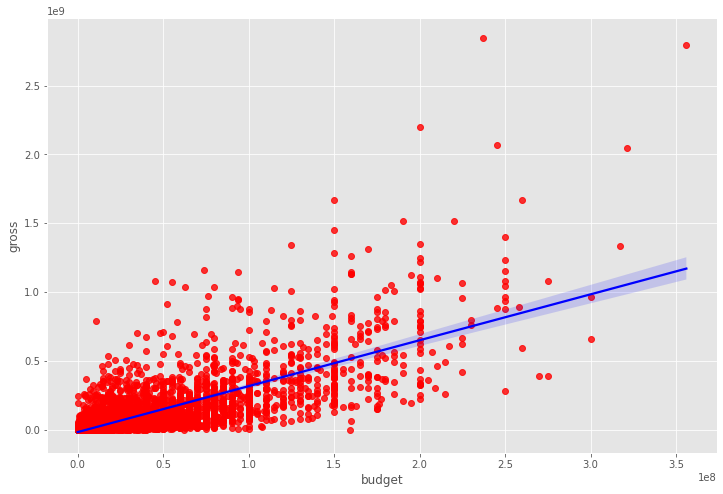

In [134]:
# Plot Budget vs Gross using Seaborn

sns.regplot(x=df['budget'], y=df['gross'], data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

### Visualization of the correlations

In [135]:
# Function to ask the correlation matrix to visualize

def ask_corr():
    
    # Create the visual
    def create_matrix(df_corr):
        sns.heatmap(df_corr, annot=True)
        plt.title("Correlation Matrix for Numeric Data Types")
        plt.xlabel('Movie Features')
        plt.ylabel('Movie Features')
        plt.show()
        # Clear the df_corr 
        df = pd.DataFrame(None)
    
    # Ask the user for the correlation method
    answer = input('Please provide correlation method \n'+
                   'Kendall, Pearson, Spearman or Average (of the three): ')
    
    if answer.lower() == 'kendall':
        print("\n\nKendall's method Selected.\n")
        df_corr = df.corr(method='kendall')
        create_matrix(df_corr)
    elif answer.lower() == 'pearson':
        print("\n\nPearson's method Selected.\n")
        df_corr = df.corr(method='kendall')
        create_matrix(df_corr)
    elif answer.lower() == 'spearman':
        print("\n\nSpearman's method Selected.\n")
        df_corr = df.corr(method='kendall')
        create_matrix(df_corr)
    else:
        print("\n\nThe Average of the three methods Selected.\n")
        df_corr = (df.corr(method='kendall') + df.corr(method='spearman') + df.corr(method='pearson')) / 3.0
        create_matrix(df_corr)

Please provide correlation method 
Kendall, Pearson, Spearman or Average (of the three): Average


The Average of the three methods Selected.



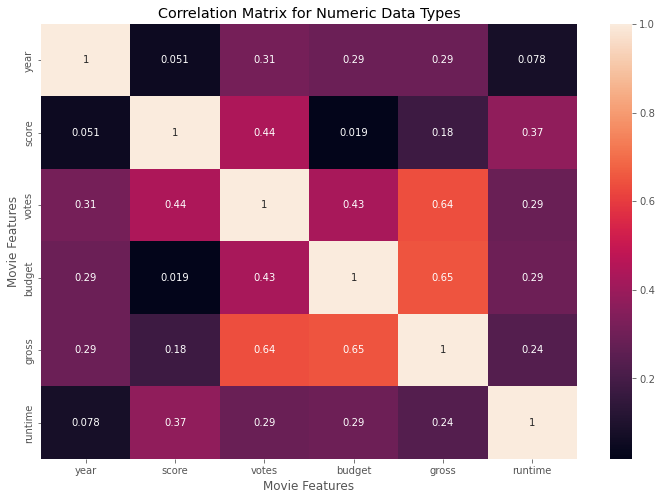

In [136]:
ask_corr()

### High correlation between 

**We observe that with the average of Kendall's, Spearman's and Pearson's correlation those are highly correlated:**
But are those the only correaltions there exists? 
We need to make numerical every column to find the correlations between those.

1. Year and Votes
2. Score and votes
3. Votes and Gross
4. Budget and Gross
5. Runtime and score





In [137]:
# Making numerical every column.dtype = 'object' 

df_num = df

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
df_num.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,3
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,3
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,3
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,3
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,3


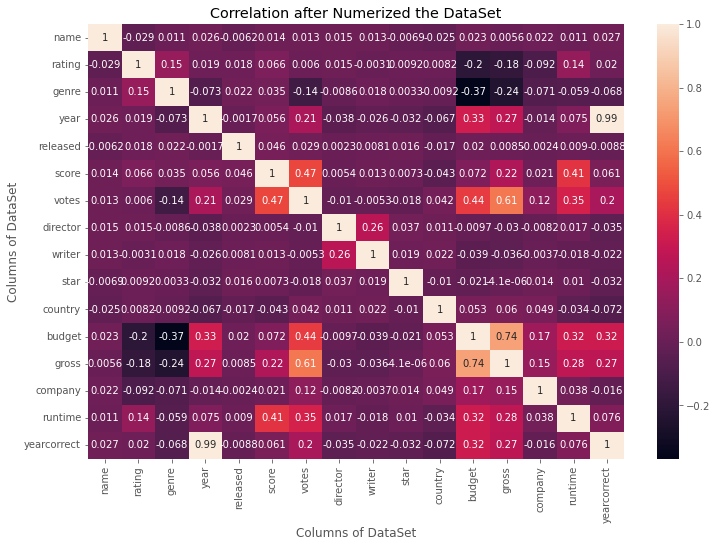

In [139]:
# Running the correlation HeatMap
df_num_corr = df_num.corr()
sns.heatmap(data=df_num_corr, annot=True)
plt.xlabel('Columns of DataSet')
plt.ylabel('Columns of DataSet')
plt.title('Correlation after Numerized the DataSet')
plt.show()

In [140]:
# Observing the numerical correlations
df_num_corr.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.026784
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.019749
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.067962
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.994821
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.008821


In [141]:
# We will unstack the correlational DataSet we created

sorted_pairs = df_num_corr.unstack().sort_values()

sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
year         genre         -0.073167
genre        year          -0.073167
country      yearcorrect   -0.071611
yearcorrect  country       -0.071611
company      genre         -0.071334
genre        company       -0.071334
yearcorrect  genre         -0.067962
genre        yearcorrect   -0.067962
year         country       -0.066748
country      year          -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [143]:
# We will return only the pairs with more than 40% correlation

sorted_pairs[ sorted_pairs > 0.4 ]

score        runtime        0.414068
runtime      score          0.414068
budget       votes          0.439675
votes        budget         0.439675
score        votes          0.474256
votes        score          0.474256
             gross          0.614751
gross        votes          0.614751
             budget         0.740247
budget       gross          0.740247
yearcorrect  year           0.994821
year         yearcorrect    0.994821
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
y

Obvisouly, we can not take the high correlation between year and yearcorrect because we corrected. The same goes for the 100% correlation pairs with themselves.

# Conclusion

We can conclude that the Gross of every movie is highly correlated with the Budget they started. An other important note is that the Votes a film got with the Gross they earned are also correlated.

We also conclude that the company's name and the movie's Writer have nothing to do with the Gross earnings a movie will earn.

The same goes for the Stars, Directors, and the Country the movies were made.